#### Essential packages require to strat the work on Logistic regression and Decision Tree

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as df
import datetime as dt
import graphviz 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib notebook

#### Method of reading dataset with pandas library

In [2]:
gme_data = pd.read_csv('GME.csv')
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,19.000000,19.100000,17.15,17.250000,17.250000,10022500
1,2021-01-05,17.350000,18.080000,17.23,17.370001,17.370001,4961500
2,2021-01-06,17.340000,18.980000,17.33,18.360001,18.360001,6056200
3,2021-01-07,18.469999,19.450001,18.02,18.080000,18.080000,6129300
4,2021-01-08,18.180000,18.299999,17.08,17.690001,17.690001,6482000


#### Data Preprocessing on Loan_Modelling dataset that must require to make the dataset usefull for Logistic Regression and Decision Tree

In [3]:
gme_data.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close   Adj Close  \
0    2021-01-04   19.000000   19.100000   17.150000   17.250000   17.250000   
1    2021-01-05   17.350000   18.080000   17.230000   17.370001   17.370001   
2    2021-01-06   17.340000   18.980000   17.330000   18.360001   18.360001   
3    2021-01-07   18.469999   19.450001   18.020000   18.080000   18.080000   
4    2021-01-08   18.180000   18.299999   17.080000   17.690001   17.690001   
..          ...         ...         ...         ...         ...         ...   
135  2021-07-19  163.300003  176.000000  161.220001  173.490005  173.490005   
136  2021-07-20  173.899994  193.639999  172.419998  191.179993  191.179993   
137  2021-07-21  187.789993  195.509995  182.110001  185.809998  185.809998   
138  2021-07-22  185.300003  187.690002  176.149994  178.850006  178.850006   
139  2021-07-23  181.000000  181.600006  173.839996  180.360001  180.360001   

       Volume  
0

#### Find Number of rows and columns method

In [4]:
gme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       140 non-null    object 
 1   Open       140 non-null    float64
 2   High       140 non-null    float64
 3   Low        140 non-null    float64
 4   Close      140 non-null    float64
 5   Adj Close  140 non-null    float64
 6   Volume     140 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.8+ KB


#### Find frequency count from the dataset for Volume

In [5]:
gme_data["Volume"].value_counts()

37382200     1
15580800     1
177874000    1
11764900     1
36455000     1
            ..
5564800      1
17094900     1
32606900     1
7132600      1
9625600      1
Name: Volume, Length: 140, dtype: int64

### Formula of Average True Range

TRi: $\max[H − L, |H − C_P|, |L − C_P|]$

ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

TR_i: A particular True Range
n: The time period employed
H: Current High
L: Current Low
C_P: Previous Close

In [6]:
high_low = gme_data['High'] - gme_data['Low']
high_cp = np.abs(gme_data['High'] - gme_data['Close'].shift())
low_cp = np.abs(gme_data['Low'] - gme_data['Close'].shift())
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [7]:
true_range = np.max(df, axis=1)
average_true_range = true_range.rolling(14).mean()
average_true_range

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
135    12.497143
136    13.497857
137    13.859286
138    13.624286
139    13.539287
Length: 140, dtype: float64

In [8]:
true_range.rolling(14).sum()/14

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
135    12.497143
136    13.497857
137    13.859286
138    13.624286
139    13.539287
Length: 140, dtype: float64

<IPython.core.display.Javascript object>


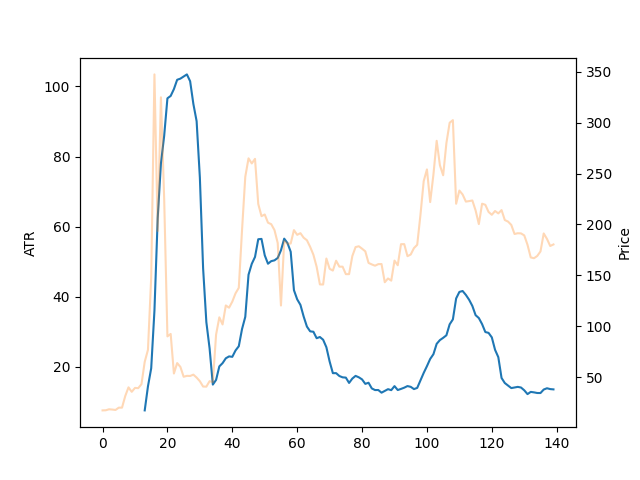

Text(0, 0.5, 'Price')

In [9]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = gme_data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")

### Exponential Moving Average (EMA)

In [10]:
gld_close = pd.DataFrame(gme_data.Close)

In [11]:
gld_close['MA_15'] = gld_close.Close.rolling(15).mean().shift()
gld_close['MA_29'] = gld_close.Close.rolling(29).mean()

In [12]:
gld_close['MA_15'].head(12)


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: MA_15, dtype: float64

<IPython.core.display.Javascript object>


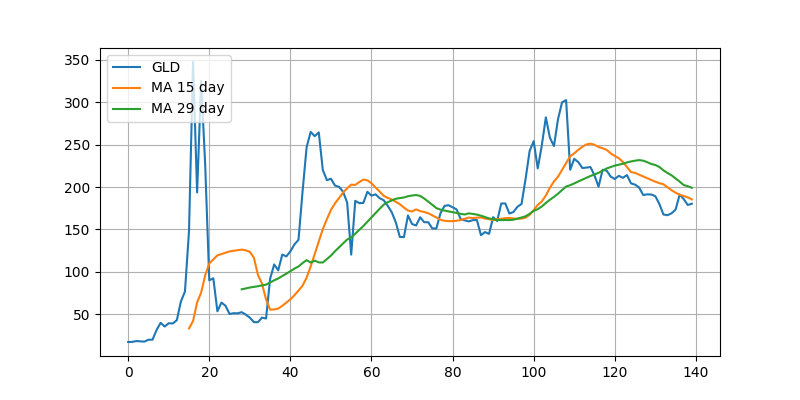

In [13]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(gld_close['Close'],label='GLD')
plt.plot(gld_close['MA_15'], label='MA 15 day')
plt.plot(gld_close['MA_29'], label='MA 29 day')
plt.legend(loc=2)

#### Relative Strength Index (RSI) indicator used to know the market current position. RSI calculation provide us essential information about the market rate is above the normal trend or below the normal trend

In [14]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 7, 23)
print(start)

2021-01-01 00:00:00


In [15]:
delta = gme_data['Close'].diff(1)

In [16]:
delta.dropna(inplace=True)

In [17]:
positive = delta.copy()
negative = delta.copy()

In [18]:
positive[positive < 0] = 0
negative[negative > 0] =0

In [19]:
days = 14
average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

In [20]:
relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

In [21]:
combined = pd.DataFrame()
combined['Close'] = gme_data['Close']
combined['RSI']= RSI

<IPython.core.display.Javascript object>


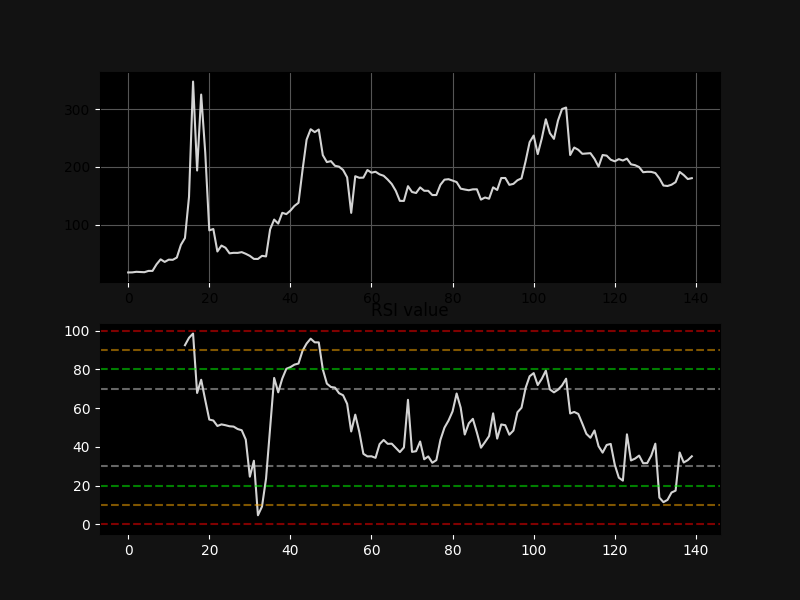

In [22]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Close'], color='lightgrey')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', color='white')
ax1.tick_params(axis='y', color='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgrey')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000')
ax2.axhline(10, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(30, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(70, linestyle='--', alpha=0.5, color='#cccccc')
ax2.axhline(80, linestyle='--', alpha=0.5, color='#00ff00')
ax2.axhline(90, linestyle='--', alpha=0.5, color='#ffaa00')
ax2.axhline(100, linestyle='--', alpha=0.5, color='#ff0000')

ax2.set_title("RSI value")
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
plt.show()

#### Moving Average Convergence Divergence (MACD) is defined as a trend follow momentum indicator that shows the relationship between highest and lowest price of the market with the technical analysis. In the graph the we can ssee the trend from upward to downward that indicate us how much rate goes up and down in future with these analysis.

<IPython.core.display.Javascript object>


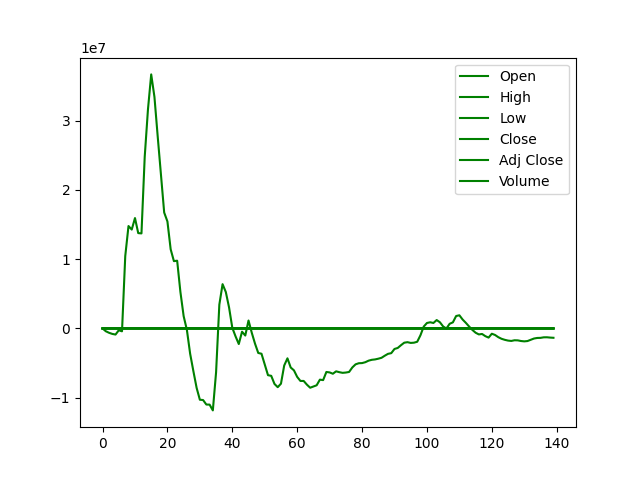

<IPython.core.display.Javascript object>


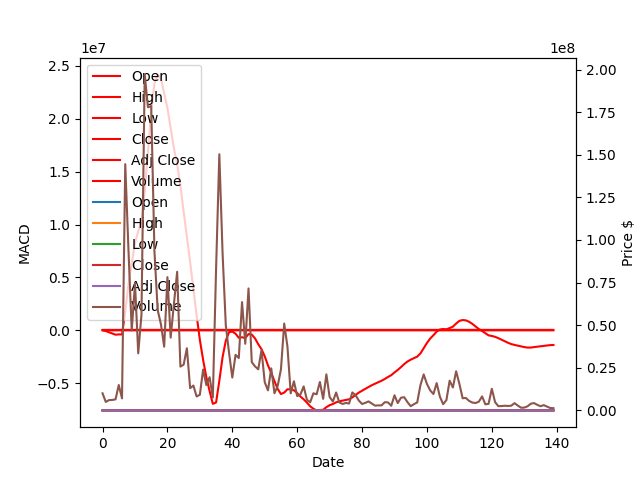

In [23]:
exp1 = gme_data.ewm(span=12, adjust=False).mean()
exp2 = gme_data.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
macd.plot(label='AAPL MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
gme_data.plot(ax=ax, secondary_y=True, label='AAPL')

ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
plt.show()

#### Average Directional Index (ADX)

In [24]:
from ta.trend import ADXIndicator
gme_data['Open'] = gme_data.Open * gme_data['Close']/gme_data['Close']
gme_data['High'] = gme_data.High * gme_data['Close']/gme_data['Close']
gme_data['Low'] = gme_data.Low * gme_data['Close']/gme_data['Close']
gme_data.dropna(inplace=True)

In [25]:
adxI = ADXIndicator(gme_data['High'],gme_data['Low'],gme_data['Close'],14,False)
gme_data['pos_directional_indicator'] = adxI.adx_pos()
gme_data['neg_directional_indicator'] = adxI.adx_neg()
gme_data['adx'] = adxI.adx()

print(gme_data['adx'])

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
135    19.399953
136    18.748084
137    18.015619
138    17.678628
139    17.498510
Name: adx, Length: 140, dtype: float64


c:\python 3.7\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\python 3.7\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


#### Splitting data for training decision tree

In [26]:
X = gme_data[['Open','High','Low','Close']]
y = gme_data['Volume']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#### Find entropy of  GME.csv dataset

In [28]:
def entropy(y):
 
  if isinstance(y, pd.Series):
    a = y.value_counts()/y.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)
  else:
    raise('Data must be from dataset')

entropy(gme_data.Volume) 

7.1292828149676755

#### Fit the Decision Tree on our dataset for that we use scikit learn library that help us to successfully train our model.

In [29]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#### We will check our Decision Tree model is successfully implemented in our dataset or not. For this we print our multiple prediction from it.

In [30]:
print(y_pred)

[35422900 24677300 14908000  7301900  4298600 26843100 14429100  1579100
 12692700 46866400  4608600 37382200 14429100  2731500 12692700 10042200
  6051500  7301900 23990600  2942800 10532100 83111700 21119900 83111700
  6129300  5120200 26843100  4007500 37382200 14828200 32606900  4345800
 11751400  7301900 13429300]


#### Let's check the accuracy of our model with  the help of sklearn library.

In [31]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_pred))

Accuracy: 1.0
